In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import sklearn as sk
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn

In [2]:
data = pd.read_csv('C:/Users/jonathan/Documents/Telecom 2A/SD201/Projet/Projet/SD201-master/shuffled_data.csv')
data.drop(columns = data.columns[0], inplace=True)
data.dropna(inplace=True)
data

,Date,Airline,Origin,Destination,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance,FlightNumber
0,2018-01-04,Delta Air Lines Inc.,MSP,MCO,1315.0,0.0,1710.0,0.0,148.0,1310.0,1487
1,2018-01-04,Delta Air Lines Inc.,ORD,ATL,1618.0,0.0,1903.0,0.0,82.0,606.0,1612
2,2018-01-15,Delta Air Lines Inc.,SLC,SEA,1117.0,0.0,1207.0,0.0,91.0,689.0,1099
3,2018-01-15,Delta Air Lines Inc.,ATL,CAK,942.0,0.0,1117.0,0.0,76.0,528.0,1190
4,2018-01-15,Delta Air Lines Inc.,ATL,HOU,1402.0,3.0,1513.0,0.0,115.0,696.0,1398
...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-03-28,Alaska Airlines Inc.,ORD,PDX,1611.0,0.0,1831.0,0.0,239.0,1739.0,669
9996,2022-03-29,Alaska Airlines Inc.,SEA,SAN,957.0,7.0,1251.0,16.0,144.0,1050.0,1176
9997,2022-03-30,Alaska Airlines Inc.,OTZ,ANC,1135.0,0.0,1302.0,0.0,76.0,548.0,154
9998,2022-03-30,Alaska Airlines Inc.,SFO,EWR,749.0,4.0,1605.0,0.0,291.0,2565.0,183


In [3]:
data.describe()

,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance,FlightNumber
count,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000
mean,1340.880661,11.791483,1477.086874,11.409519,101.937275,723.386673,2798.868838
std,495.927893,44.997121,525.547054,44.325228,64.717176,541.518499,1866.211263
min,1.000000,0.000000,1.000000,0.000000,13.000000,41.000000,1.000000
25%,926.000000,0.000000,1058.000000,0.000000,57.000000,342.000000,1146.000000
50%,1329.500000,0.000000,1509.000000,0.000000,85.000000,584.000000,2493.500000
75%,1743.000000,5.000000,1915.250000,5.000000,128.000000,937.000000,4665.750000
max,2358.000000,1174.000000,2400.000000,1152.000000,633.000000,5095.000000,9378.000000


We can check that if Departure Time and Departure delay are correlated, this is not supposed to be the case, but actually, the later the time of departure it is, the more probable the plane will be delayed, supposing that we have the same frequency of flights at any time of the day.

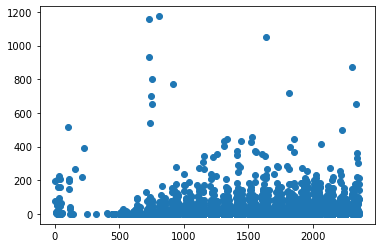

In [4]:
plt.plot(data["DepTime"], data["DepDelay"], 'o')

<AxesSubplot:>

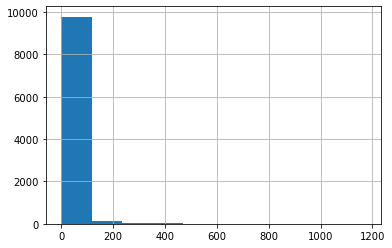

In [5]:
data['DepDelay'].hist()

However it seems obvious that distance and time spent flying are correlated, we can deduce the average speed of planes by getting the derivative of the graph AirTime = f(Distance)

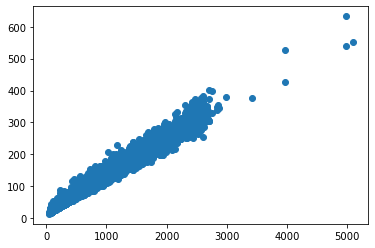

In [6]:
plt.plot(data["Distance"], data["AirTime"], 'o')

In [7]:
def train_test_split(data: pd.DataFrame, target_key:str, percent_test: int =15, percent_validation: int=5):
    # Write code here 
    data = data.sample(frac=1)
    
    first_separator = len(data) - int(len(data) / 100 * (percent_test+percent_validation))
    second_separator = len(data) - int(len(data) / 100 * percent_validation)
    
    X_train = data.loc[:first_separator, :]
    y_train = data.loc[:first_separator, target_key]
    
    X_test = data.loc[first_separator:second_separator, :]
    y_test = data.loc[first_separator:second_separator, target_key]
    #third_separator = int(len(data) / 100 * percent_test)
    #X_test = X_test.loc[:third_separator, :]
    #y_test = y_test.loc[:third_separator, target_key]
    
    X_validation = data.loc[second_separator:, :]
    y_validation = data.loc[second_separator:, target_key]
    
    X_test.drop(target_key, inplace=True, axis=1)
    X_train.drop(target_key, inplace=True, axis=1)
    X_validation.drop(target_key, inplace=True, axis=1)
    
    return X_train, y_train, X_test, y_test, X_validation, y_validation

In [8]:
data["Airline"] = LabelEncoder().fit_transform(data["Airline"])
data["Origin"] = LabelEncoder().fit_transform(data["Origin"])
data["Destination"] = LabelEncoder().fit_transform(data["Destination"])

X_train, y_train, X_test, y_test, X_validation, y_validation = train_test_split(data, target_key="DepDelay")

C:\Users\jonathan\AppData\Local\Temp\ipykernel_15600\2571415189.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(target_key, inplace=True, axis=1)
C:\Users\jonathan\AppData\Local\Temp\ipykernel_15600\2571415189.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(target_key, inplace=True, axis=1)
C:\Users\jonathan\AppData\Local\Temp\ipykernel_15600\2571415189.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [9]:
def normalize(data: pd.Series):
    norm_data = data - min(data) / (max(data) - min(data))
    return norm_data, min(data), max(data)

def standardize(data: pd.Series):
    stand_data = data - data.mean() / data.std()
    return stand_data, data.mean(), data.std()

In [10]:
class MajorityClassifier():
    def __init__(self):
        self.majorityClass = None
        self.classes = None
    
    def fit(self, X, y):
        # Write code that will find the majority class in 
        # X, y and will set the class attribute accordingly
        # Tip: you do not need X in this case
        classes = {}
        for value in y:
            if value not in classes:
                classes[value] = 1
            else:
                classes[value] += 1
        
        max_key = max(classes, key=classes.get)
        self.majorityClass = max_key
        self.classes = classes
        
        return # This function does not need to return anything
    
    def predict(self, X):
        preds = []
        
        try:
            if self.majorityClass is None:
                raise(ValueError)
        except ValueError:
            print("ValueError: Cannot predict on an unfitted model. Run fit() on your train data first.")
            
        # Write prediction code here: we predict the majority class for everyone
        for x in X:
            preds.append(self.majorityClass)
        
        return preds

In [11]:
mc = MajorityClassifier()
mc.fit(X_train, y_train)
mc_preds = mc.predict(X_test)

In [12]:
print (mc_preds)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [13]:
def convertTime(str_time):
    timestamp = datetime.datetime.strptime(str_time,"%Y-%m-%d")
    tuple = timestamp.timetuple()
    timestamp = time.mktime(tuple)

    return(timestamp)

In [14]:
data['Date'] = data['Date'].apply(convertTime)
data
X_train, y_train, X_test, y_test, X_validation, y_validation = train_test_split(data, target_key="DepDelay")

C:\Users\jonathan\AppData\Local\Temp\ipykernel_15600\2571415189.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(target_key, inplace=True, axis=1)
C:\Users\jonathan\AppData\Local\Temp\ipykernel_15600\2571415189.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(target_key, inplace=True, axis=1)
C:\Users\jonathan\AppData\Local\Temp\ipykernel_15600\2571415189.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [15]:
class kNNClassifier():
    def __init__(self, k: int = 2):
        self.k = k
    
    def get_closest_points(self, x: pd.Series):
        closest_points = []
        
        return closest_points
    
    def fit(self, X: pd.DataFrame, y):
        # In the basic k-NN, there is no need for a training phase.
        # You can ignore this function.
        # In the more advanced k-NN, you can write the hashing code here.
        
        
        return # This function does not need to return anything
    
    def predict(self, X: pd.DataFrame):
        # Write code that will find the k closest points from each data point.
        # For this, you need first to compute the distances from every point to every other.
        # Then, find the k closest points, and predict the majority class.
    
        preds = []
        
        
        return preds

In [26]:
X_validation

,Date,Airline,Origin,Destination,DepTime,ArrTime,ArrDelay,AirTime,Distance,FlightNumber
9481,1.656972e+09,6,76,249,601.0,700.0,0.0,44.0,247.0,802
5960,1.547766e+09,1,61,69,2205.0,2315.0,0.0,54.0,335.0,5134
8682,1.634508e+09,6,181,77,1500.0,1645.0,0.0,206.0,1546.0,5049
6513,1.609110e+09,5,215,140,828.0,1104.0,11.0,31.0,177.0,3032
2200,1.571090e+09,6,79,221,1429.0,1505.0,0.0,80.0,602.0,971
...,...,...,...,...,...,...,...,...,...,...
1383,1.537222e+09,2,16,134,1719.0,1855.0,0.0,78.0,534.0,1442
4177,1.573340e+09,6,62,176,1032.0,1238.0,0.0,109.0,802.0,137
5761,1.546729e+09,6,107,279,1504.0,1602.0,22.0,37.0,197.0,2543
3720,1.553814e+09,6,78,178,1646.0,1740.0,0.0,95.0,601.0,507


In [16]:
knn = kNNClassifier(k=3)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required.